# Machine Learning Major Project

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#EDA0">Description</a></li>
        <li><a href="#tdl">To Do List</a></li>
        <li><a href="#Ques">Questions</a></li>
        <li><a href="#EDA">Feature Selection</a></li>
        <li><a href="#EDA2">Feature Engineering</a></li>
        <li><a href="#EDA3">Balancing</a></li>
        <li><a href="knn">KNN</a></li>
        <li><a href="#support_vector_machines">Support Vector Machines</a></li>
        <li><a href="#nb">Naive Bayes</a></li>
        <li><a href="#random_forest">Random Forest</a></li>
        <li><a href="#ans">Answers</a></li>
    </ol>
</div>
<br>
<hr>

I took a dataset from kaggle.

It is about reviews adout restraunts in different(31) cities.

Actually given dataset had many columns with same values , there are columns with different values but they are useless like id,timezone,etc;

<div id="EDA0">
<h2 id="EDA0">Description</h2>
</div>

#### Columns:

###### Name              :    
Name of the restraunt.

###### City                :
Place where restraunt is located.

##### Cuisine Style :
Types of dishes available.

##### Ranking         :
Rank of restraunt in the located city.

##### Rating           :
Rating given by custumers.

##### Price Range :
Range of different items.

##### Number of Reviews:
Number of custumers gave reviews.

##### Reviews      :
Common review gave by custumers for that restraunt.

##### URL_TA      :
Source website.

##### ID_TA         :
ID numbers for Restraunt.

<div id="tdl">
<h2 id="tdl">To Do List</h2>
</div>

1.Applying EDA and Feature selection(whenever needed).

2.Sentiment Analysis of Reviews.

3.Feature Engineering of Sentiment Analysis of Reviwes.

4.Applying Algos.

5.Ensemble Modelling.

6.Answering Questions.

<div id="Ques">
<h2 id="Ques">Questions</h2>
</div>

#### 1.What is the common Cuisine Style available in Restaurants with negetive reviews ?

#### 2.Which city has more ratio of positive reviews ?

#### 3.What is the most common word used and emotion used in both positive and negative reviewed restaurants ?



#### NOTE : Dependent variable in this data is not available . Sentiment analysis is the dependent variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,8

In [2]:
df2=pd.read_csv('TA_restaurants_curated.csv')

In [3]:
df2

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-K...,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-B...,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-R...,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Y...,d13323362


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         125527 non-null  int64  
 1   Name               125527 non-null  object 
 2   City               125527 non-null  object 
 3   Cuisine Style      94176 non-null   object 
 4   Ranking            115876 non-null  float64
 5   Rating             115897 non-null  float64
 6   Price Range        77672 non-null   object 
 7   Number of Reviews  108183 non-null  float64
 8   Reviews            115911 non-null  object 
 9   URL_TA             125527 non-null  object 
 10  ID_TA              125527 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [6]:
df2=df2.dropna()

In [7]:
df2

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125423,1563,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,$$ - $$$,53.0,"[['Good food and nice experience', 'Disappoint...",/Restaurant_Review-g188113-d697907-Reviews-Taj...,d697907
125434,1574,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,$$ - $$$,104.0,"[['Good service', 'nice atmoshphere'], ['06/27...",/Restaurant_Review-g188113-d1187556-Reviews-Fo...,d1187556
125435,1575,PurPur,Zurich,['Bar'],1581.0,2.0,$$ - $$$,150.0,"[['Worst New Year’s Eve experience', 'HORRIBLE...",/Restaurant_Review-g188113-d939089-Reviews-Pur...,d939089
125438,1578,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,$$$$,21.0,"[['Horrible!', 'It was really horrible, I woul...",/Restaurant_Review-g188113-d1551957-Reviews-Ja...,d1551957


In [8]:
df2.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

<div id="EDA">
<h2 id="EDA">Feature Selection</h2>
</div>

In [9]:
df2=df2[['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews']]

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74225 entries, 0 to 125445
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               74225 non-null  object 
 1   City               74225 non-null  object 
 2   Cuisine Style      74225 non-null  object 
 3   Ranking            74225 non-null  float64
 4   Rating             74225 non-null  float64
 5   Price Range        74225 non-null  object 
 6   Number of Reviews  74225 non-null  float64
 7   Reviews            74225 non-null  object 
dtypes: float64(3), object(5)
memory usage: 5.1+ MB


In [11]:
df2.index=np.arange(74225)

In [12]:
lst=[]
for i in df2.Reviews:
    x=i.replace("[['",'').replace("']]",'').replace('"]]','').replace('[["','').split('], [')
    lst.append(x[0])

In [13]:
ls=[]
for i in lst:
    ls.append(i.replace("', '",' ').replace('", ',' ').replace("'",'').replace('"',''))

In [14]:
stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

<div id="EDA2">
<h2 id="EDA2">Feature Engineering</h2>
</div>

In [15]:
df2['reviews']=ls

C:\Users\91824\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df2

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",Just like home A Warm Welcome to Wintry Amsterdam
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",Great food and staff just perfect
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",Satisfaction Delicious old school restaurant
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",True five star dinner A superb evening of fine...
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",Best meal.... EVER super food experience
...,...,...,...,...,...,...,...,...,...
74220,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,$$ - $$$,53.0,"[['Good food and nice experience', 'Disappoint...",Good food and nice experience Disappointing
74221,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,$$ - $$$,104.0,"[['Good service', 'nice atmoshphere'], ['06/27...",Good service nice atmoshphere
74222,PurPur,Zurich,['Bar'],1581.0,2.0,$$ - $$$,150.0,"[['Worst New Year’s Eve experience', 'HORRIBLE...",Worst New Year’s Eve experience HORRIBLE
74223,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,$$$$,21.0,"[['Horrible!', 'It was really horrible, I woul...","Horrible! It was really horrible, I would neve..."


In [17]:
df2.columns

Index(['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range',
       'Number of Reviews', 'Reviews', 'reviews'],
      dtype='object')

In [18]:
df=df2[['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range',
       'Number of Reviews', 'reviews']]

In [19]:
df.groupby('Ranking').size()

Ranking
1.0        31
2.0        31
3.0        31
4.0        31
5.0        31
           ..
16367.0     1
16392.0     1
16401.0     1
16405.0     1
16443.0     1
Length: 13307, dtype: int64

In [20]:
df['Price Range'][50]

'$$ - $$$'

In [21]:
df=df.drop('Price Range',axis=1)

In [22]:
df

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,Just like home A Warm Welcome to Wintry Amsterdam
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,Great food and staff just perfect
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,Satisfaction Delicious old school restaurant
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,True five star dinner A superb evening of fine...
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,Best meal.... EVER super food experience
...,...,...,...,...,...,...,...
74220,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,53.0,Good food and nice experience Disappointing
74221,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,104.0,Good service nice atmoshphere
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,Worst New Year’s Eve experience HORRIBLE
74223,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,21.0,"Horrible! It was really horrible, I would neve..."


In [23]:
df.groupby('City').size()

City
Amsterdam      2426
Athens         1166
Barcelona      5079
Berlin         3438
Bratislava      426
Brussels       2014
Budapest       1640
Copenhagen     1273
Dublin         1460
Edinburgh      1404
Geneva          954
Hamburg        1197
Helsinki        754
Krakow          826
Lisbon         2386
Ljubljana       317
London        11622
Luxembourg      437
Lyon           1376
Madrid         4685
Milan          3737
Munich         1679
Oporto         1013
Oslo            749
Paris          9281
Prague         2527
Rome           4654
Stockholm      1364
Vienna         2025
Warsaw         1236
Zurich         1080
dtype: int64

In [24]:
city=[]
for i in df.City:
    city.append(i)

In [25]:
city_s=set(city)

In [26]:
len(city_s)

31

In [27]:
x=np.arange(31)

In [28]:
city_s=list(city_s)

In [29]:
k=list(zip(city_s,x))

In [30]:
k

[('Athens', 0),
 ('Rome', 1),
 ('Copenhagen', 2),
 ('Geneva', 3),
 ('Helsinki', 4),
 ('Munich', 5),
 ('Oporto', 6),
 ('Lyon', 7),
 ('Hamburg', 8),
 ('Dublin', 9),
 ('London', 10),
 ('Madrid', 11),
 ('Vienna', 12),
 ('Edinburgh', 13),
 ('Zurich', 14),
 ('Berlin', 15),
 ('Warsaw', 16),
 ('Amsterdam', 17),
 ('Lisbon', 18),
 ('Stockholm', 19),
 ('Luxembourg', 20),
 ('Bratislava', 21),
 ('Ljubljana', 22),
 ('Brussels', 23),
 ('Prague', 24),
 ('Barcelona', 25),
 ('Budapest', 26),
 ('Krakow', 27),
 ('Milan', 28),
 ('Paris', 29),
 ('Oslo', 30)]

In [31]:
k[0][0]

'Athens'

In [32]:
new=[]
for i in df.City:
    for j in k:
        if i==j[0]:
            new.append(j[1])

In [33]:
df['city_num']=new

In [34]:
df

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,reviews,city_num
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,Just like home A Warm Welcome to Wintry Amsterdam,17
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,Great food and staff just perfect,17
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,Satisfaction Delicious old school restaurant,17
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,True five star dinner A superb evening of fine...,17
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,Best meal.... EVER super food experience,17
...,...,...,...,...,...,...,...,...
74220,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,53.0,Good food and nice experience Disappointing,14
74221,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,104.0,Good service nice atmoshphere,14
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,Worst New Year’s Eve experience HORRIBLE,14
74223,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,21.0,"Horrible! It was really horrible, I would neve...",14


In [35]:
y=[]
for i in df.reviews:
    y.append(i.encode('ascii','ignore').decode('ascii'))

In [36]:
def em(List):
    lst=[]
    with open('Emo_List.txt','r') as file:
        for line in file:
            new=line.replace('\n','').replace(',','').replace("'",'').strip()
            word,emotion=new.split(':')
            for i in List:
                if fuzz.ratio(i,word)>=70:
                    lst.append(emotion)
        if len(lst)==0:
            x='neutral'
        else:
            cd=Counter(lst)
            x=list(cd.keys())[0]
    return x

In [37]:
df['Review']=y

In [38]:
df=df.drop('reviews',axis=1)

In [39]:
df.Review=df.Review.str.lower()

In [40]:
df

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,17,just like home a warm welcome to wintry amsterdam
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,17,great food and staff just perfect
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,17,satisfaction delicious old school restaurant
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,17,true five star dinner a superb evening of fine...
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,17,best meal.... ever super food experience
...,...,...,...,...,...,...,...,...
74220,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,53.0,14,good food and nice experience disappointing
74221,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,104.0,14,good service nice atmoshphere
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible
74223,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,21.0,14,"horrible! it was really horrible, i would neve..."


In [41]:
punc="'!@$%^&*()_-<>.,\|[]{}?/;:`~"
y1=[]
for i in df.Review:
    x=""
    for c in i:
        if c not in punc:
            x=x+c
    y1.append(x)

In [42]:
df['Review']=y1

In [43]:
y2=[]
for i in df.Review:
    l=i.split(' ')
    p=""
    for j in l:
        if j not in stop_words:
            p=p+' '+j
    y2.append(p)

In [44]:
from collections import Counter

In [45]:
st="a+ abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolades accommodative accomodative accomplish accomplished accomplishment accomplishments accurate accurately achievable achievement achievements achievible acumen adaptable adaptive adequate adjustable admirable admirably admiration admire admirer admiring admiringly adorable adore adored adorer adoring adoringly adroit adroitly adulate adulation adulatory advanced advantage advantageous advantageously advantages adventuresome adventurous advocate advocated advocates affability affable affably affectation affection affectionate affinity affirm affirmation affirmative affluence affluent afford affordable affordably afordable agile agilely agility agreeable agreeableness agreeably all-around alluring alluringly altruistic altruistically amaze amazed amazement amazes amazing amazingly ambitious ambitiously ameliorate amenable amenity amiability amiabily amiable amicability amicable amicably amity ample amply amuse amusing amusingly angel angelic apotheosis appeal appealing applaud appreciable appreciate appreciated appreciates appreciative appreciatively appropriate approval approve ardent ardently ardor articulate aspiration aspirations aspire assurance assurances assure assuredly assuring astonish astonished astonishing astonishingly astonishment astound astounded astounding astoundingly astutely attentive attraction attractive attractively attune audible audibly auspicious authentic authoritative autonomous available aver avid avidly award awarded awards awe awed awesome awesomely awesomeness awestruck awsome backbone balanced bargain beauteous beautiful beautifullly beautifully beautify beauty beckon beckoned beckoning beckons believable believeable beloved benefactor beneficent beneficial beneficially beneficiary benefit benefits benevolence benevolent benifits best bestknown bestperforming bestselling better betterknown betterthan-expected beutifully blameless bless blessing bliss blissful blissfully blithe blockbuster bloom blossom bolster bonny bonus bonuses boom booming boost boundless bountiful brainiest brainy brand-new brave bravery bravo breakthrough breakthroughs breathlessness breathtaking breathtakingly breeze bright brighten brighter brightest brilliance brilliances brilliant brilliantly brisk brotherly bullish buoyant cajole calm calming calmness capability capable capably captivate captivating carefree cashback cashbacks catchy celebrate celebrated celebration celebratory champ champion charisma charismatic charitable charm charming charmingly chaste cheaper cheapest cheer cheerful cheery cherish cherished cherub chic chivalrous chivalry civility civilize clarity classic classy clean cleaner cleanest cleanliness cleanly clear clear-cut cleared clearer clearly clears clever cleverly cohere coherence coherent cohesive colorful comely comfort comfortable comfortably comforting comfy commend commendable commendably commitment commodious compact compactly compassion compassionate compatible competitive complement complementary complemented complements compliant compliment complimentary comprehensive conciliate conciliatory concise confidence confident congenial congratulate congratulation congratulations congratulatory conscientious considerate consistent consistently constructive consummate contentment continuity contrasty contribution convenience convenient conveniently convience convienient convient convincing convincingly cool coolest cooperative cooperatively cornerstone correct correctly cost-effective cost-saving counter-attack counter-attacks courage courageous courageously courageousness courteous courtly covenant cozy creative credence credible crisp crisper cure cure-all cushy cute cuteness danke danken daring daringly darling dashing dauntless dawn dazzle dazzled dazzling dead-cheap dead-on decency decent decisive decisiveness dedicated defeat defeated defeating defeats defender deference deft deginified delectable delicacy delicate delicious delight delighted delightful delightfully delightfulness dependable dependably deservedly deserving desirable desiring desirous destiny detachable devout dexterous dexterously dextrous dignified dignify dignity diligence diligent diligently diplomatic dirt-cheap distinction distinctive distinguished diversified divine divinely dominate dominated dominates dote dotingly doubtless dreamland dumbfounded dumbfounding dummy-proof durable dynamic eager eagerly eagerness earnest earnestly earnestness ease eased eases easier easiest easiness easing easy easy-to-use easygoing ebullience ebullient ebulliently ecenomical economical ecstasies ecstasy ecstatic ecstatically edify educated effective effectively effectiveness effectual efficacious efficient efficiently effortless effortlessly effusion effusive effusively effusiveness elan elate elated elatedly elation electrify elegance elegant elegantly elevate elite eloquence eloquent eloquently embolden eminence eminent empathize empathy empower empowerment enchant enchanted enchanting enchantingly encourage encouragement encouraging encouragingly endear endearing endorse endorsed endorsement endorses endorsing energetic energize energy-efficient energy-saving engaging engrossing enhance enhanced enhancement enhances enjoy enjoyable enjoyably enjoyed enjoying enjoyment enjoys enlighten enlightenment enliven ennoble enough enrapt enrapture enraptured enrich enrichment enterprising entertain entertaining entertains enthral enthrall enthralled enthuse enthusiasm enthusiast enthusiastic enthusiastically entice enticed enticing enticingly entranced entrancing entrust enviable enviably envious enviously enviousness envy equitable ergonomical err-free erudite ethical eulogize euphoria euphoric euphorically evaluative evenly eventful everlasting evocative exalt exaltation exalted exaltedly exalting exaltingly examplar examplary excallent exceed exceeded exceeding exceedingly exceeds excel exceled excelent excellant excelled excellence excellency excellent excellently excels exceptional exceptionally excite excited excitedly excitedness excitement excites exciting excitingly exellent exemplar exemplary exhilarate exhilarating exhilaratingly exhilaration exonerate expansive expeditiously expertly exquisite exquisitely extol extoll extraordinarily extraordinary exuberance exuberant exuberantly exult exultant exultation exultingly eye-catch eye-catching eyecatch eyecatching fabulous fabulously facilitate fair fairly fairness faith faithful faithfully faithfulness fame famed famous famously fancier fancinating fancy fanfare fans fantastic fantastically fascinate fascinating fascinatingly fascination fashionable fashionably fast fast-growing fast-paced faster fastest fastest-growing faultless fav fave favor favorable favored favorite favorited favour fearless fearlessly feasible feasibly feat feature-rich fecilitous feisty felicitate felicitous felicity fertile fervent fervently fervid fervidly fervor festive fidelity fiery fine fine-looking finely finer finest firmer first-class first-in-class first-rate flashy flatter flattering flatteringly flawless flawlessly flexibility flexible flourish flourishing fluent flutter fond fondly fondness foolproof foremost foresight formidable fortitude fortuitous fortuitously fortunate fortunately fortune fragrant free freed freedom freedoms fresh fresher freshest friendliness friendly frolic frugal fruitful ftw fulfillment fun futurestic futuristic gaiety gaily gain gained gainful gainfully gaining gains gallant gallantly galore geekier geeky gem gems generosity generous generously genial genius gentle gentlest genuine gifted glad gladden gladly gladness glamorous glee gleeful gleefully glimmer glimmering glisten glistening glitter glitz glorify glorious gloriously glory glow glowing glowingly god-given god-send godlike godsend gold golden good goodly goodness goodwill goood gooood gorgeous gorgeously grace graceful gracefully gracious graciously graciousness grand grandeur grateful gratefully gratification gratified gratifies gratify gratifying gratifyingly gratitude great greatest greatness grin groundbreaking guarantee guidance guiltless gumption gush gusto gutsy hail halcyon hale hallmark hallmarks hallowed handier handily hands-down handsome handsomely handy happier happily happiness happy hard-working hardier hardy harmless harmonious harmoniously harmonize harmony headway heal healthful healthy hearten heartening heartfelt heartily heartwarming heaven heavenly helped helpful helping hero heroic heroically heroine heroize heros highquality highspirited hilarious holy homage honest honesty honor honorable honored honoring hooray hopeful hospitable hot hotcake hotcakes hottest hug humane humble humility humor humorous humorously humour humourous ideal idealize ideally idol idolize idolized idyllic illuminate illuminati illuminating illumine illustrious ilu imaculate imaginative immaculate immaculately immense impartial impartiality impartially impassioned impeccable impeccably important impress impressed impresses impressive impressively impressiveness improve improved improvement improvements improves improving incredible incredibly indebted individualized indulgence indulgent industrious inestimable inestimably inexpensive infallibility infallible infallibly influential ingenious ingeniously ingenuity ingenuous ingenuously innocuous innovation innovative inpressed insightful insightfully inspiration inspirational inspire inspiring instantly instructive instrumental integral integrated intelligence intelligent intelligible interesting interests intimacy intimate intricate intrigue intriguing intriguingly intuitive invaluable invaluablely inventive invigorate invigorating invincibility invincible inviolable inviolate invulnerable irreplaceable irreproachable irresistible irresistibly issue-free jaw-droping jaw-dropping jollify jolly jovial joy joyful joyfully joyous joyously jubilant jubilantly jubilate jubilation jubiliant judicious justly keen keenly keenness kid-friendly kindliness kindly kindness knowledgeable kudos largecapacity laud laudable laudably lavish lavishly lawabiding lawful lawfully lead leading leads lean led legendary leverage levity liberate liberation liberty lifesaver light-hearted lighter likable like liked likes liking lionhearted lively logical long-lasting lovable lovably love loved loveliness lovely lover loves loving lowcost lowprice lowpriced lowrisk lowerpriced loyal loyalty lucid lucidly luck luckier luckiest luckiness lucky lucrative luminous lush luster lustrous luxuriant luxuriate luxurious luxuriously luxury lyrical magic magical magnanimous magnanimously magnificence magnificent magnificently majestic majesty manageable maneuverable marvel marveled marvelled marvellous marvelous marvelously marvelousness marvels master masterful masterfully masterpiece masterpieces masters mastery matchless mature maturely maturity meaningful memorable merciful mercifully mercy merit meritorious merrily merriment merriness merry mesmerize mesmerized mesmerizes mesmerizing mesmerizingly meticulous meticulously mightily mighty mind-blowing miracle miracles miraculous miraculously miraculousness modern modest modesty momentous monumental monumentally morality motivated multi-purpose navigable neat neatest neatly nice nicely nicer nicest nifty nimble noble nobly noiseless non-violence non-violent notably noteworthy nourish nourishing nourishment novelty nurturing oasis obsession obsessions obtainable openly openness optimal optimism optimistic opulent orderly originality outdo outdone outperform outperformed outperforming outperforms outshine outshone outsmart outstanding outstandingly outstrip outwit ovation overjoyed overtake overtaken overtakes overtaking overtook overture pain-free painless painlessly palatial pamper pampered pamperedly pamperedness pampers panoramic paradise paramount pardon passion passionate passionately patience patient patiently patriot patriotic peace peaceable peaceful peacefully peacekeepers peach peerless pep pepped pepping peppy peps perfect perfection perfectly permissible perseverance persevere personages personalized phenomenal phenomenally picturesque piety pinnacle playful playfully pleasant pleasantly pleased pleases pleasing pleasingly pleasurable pleasurably pleasure plentiful pluses plush plusses poetic poeticize poignant poise poised polished polite politeness popular portable posh positive positively positives powerful powerfully praise praiseworthy praising pre-eminent precious precise precisely preeminent prefer preferable preferably prefered preferes preferring prefers premier prestige prestigious prettily pretty priceless pride principled privilege privileged prize proactive problemfree problemsolver prodigious prodigiously prodigy productive productively proficient proficiently profound profoundly profuse profusion progress progressive prolific prominence prominent promise promised promises promising promoter prompt promptly proper properly propitious propitiously pros prosper prosperity prosperous prospros protect protection protective proud proven proves providence proving prowess prudence prudent prudently punctual pure purify purposeful quaint qualified qualify quicker quiet quieter radiance radiant rapid rapport rapt rapture raptureous raptureously rapturous rapturously rational razor-sharp reachable readable readily ready reaffirm reaffirmation realistic realizable reasonable reasonably reasoned reassurance reassure receptive reclaim recomend recommend recommendation recommendations recommended reconcile reconciliation record-setting recover recovery rectification rectify rectifying redeem redeeming redemption refine refined refinement reform reformed reforming reforms refresh refreshed refreshing refund refunded regal regally regard rejoice rejoicing rejoicingly rejuvenate rejuvenated rejuvenating relaxed relent reliable reliably relief relish remarkable remarkably remedy remission remunerate renaissance renewed renown renowned replaceable reputable reputation resilient resolute resound resounding resourceful resourcefulness respect respectable respectful respectfully respite resplendent responsibly responsive restful restored restructure restructured restructuring retractable revel revelation revere reverence reverent reverently revitalize revival revive revives revolutionary revolutionize revolutionized revolutionizes reward rewarding rewardingly rich richer richly richness right righten righteous righteously righteousness rightful rightfully rightly rightness risk-free robust rock-star rock-stars rockstar rockstars romantic romantically romanticize roomier roomy rosy safe safely sagacity sagely saint saintliness saintly salutary salute sane satisfactorily satisfactory satisfied satisfies satisfy satisfying satisified saver savings savior savvy scenic seamless seasoned secure securely selective self-determination self-respect self-satisfaction self-sufficiency self-sufficient sensation sensational sensationally sensations sensible sensibly sensitive serene serenity sexy sharp sharper sharpest shimmering shimmeringly shine shiny significant silent simpler simplest simplified simplifies simplify simplifying sincere sincerely sincerity skill skilled skillful skillfully slammin sleek slick smart smarter smartest smartly smile smiles smiling smilingly smitten smooth smoother smoothes smoothest smoothly snappy snazzy sociable soft softer solace solicitous solicitously solid solidarity soothe soothingly sophisticated soulful soundly soundness spacious sparkle sparkling spectacular spectacularly speedily speedy spellbind spellbinding spellbindingly spellbound spirited spiritual splendid splendidly splendor spontaneous sporty spotless sprightly stability stabilize stable stainless standout state-of-the-art stately statuesque staunch staunchly staunchness steadfast steadfastly steadfastness steadiest steadiness steady stellar stellarly stimulate stimulates stimulating stimulative stirringly straighten straightforward streamlined striking strikingly striving strong stronger strongest stunned stunning stunningly stupendous stupendously sturdier sturdy stylish stylishly stylized suave suavely sublime subsidize subsidized subsidizes subsidizing substantive succeed succeeded succeeding succeeds succes success successes successful successfully suffice sufficed suffices sufficient sufficiently suitable sumptuous sumptuously sumptuousness super superb superbly superior superiority supple support supported supporter supporting supportive supports supremacy supreme supremely supurb supurbly surmount surpass surreal survival survivor sustainability sustainable swank swankier swankiest swanky sweeping sweet sweeten sweetheart sweetly sweetness swift swiftness talent talented talents tantalize tantalizing tantalizingly tempt tempting temptingly tenacious tenaciously tenacity tender tenderly terrific terrifically thank thankful thinner thoughtful thoughtfully thoughtfulness thrift thrifty thrill thrilled thrilling thrillingly thrills thrive thriving thumb-up thumbs-up tickle tidy time-honored timely tingle titillate titillating titillatingly togetherness tolerable tollfree top topnotch topquality topnotch tops tough tougher toughest traction tranquil tranquility transparent treasure tremendously trendy triumph triumphal triumphant triumphantly trivially trophy trouble-free trump trumpet trust trusted trusting trustingly trustworthiness trustworthy trusty truthful truthfully truthfulness twinkly ultra-crisp unabashed unabashedly unaffected unassailable unbeatable unbiased unbound uncomplicated unconditional undamaged undaunted understandable undisputable undisputably undisputed unencumbered unequivocal unequivocally unfazed unfettered unforgettable unity unlimited unmatched unparalleled unquestionable unquestionably unreal unrestricted unrivaled unselfish unwavering upbeat upgradable upgradeable upgraded upheld uphold uplift uplifting upliftingly upliftment upscale usable useable useful user-friendly user-replaceable valiant valiantly valor valuable variety venerate verifiable veritable versatile versatility vibrant vibrantly victorious victory viewable vigilance vigilant virtue virtuous virtuously visionary vivacious vivid vouch vouchsafe warm warmer warmhearted warmly warmth wealthy welcome well wellbacklit wellbalanced wellbehaved wellbeing wellbred wellconnected welleducated wellestablished wellinformed wellintentioned wellknown wellmade wellmanaged wellmannered wellpositioned wellreceived wellregarded wellrounded wellrun wellwishers wellbeing whoa wholeheartedly wholesome whooa whoooa wieldy willing willingly willingness win windfall winnable winner winners winning wins wisdom wise wisely witty won wonder wonderful wonderfully wonderous wonderously wonders wondrous woo work workable worked works world-famous worth worth-while worthiness worthwhile worthy wow wowed wowing wows yay youthful zeal zenith zest zippy"

In [46]:
positive=st.split(' ')

In [47]:
st='2faced 2faces abnormal abolish abominable abominably abominate abomination abort aborted aborts abrade abrasive abrupt abruptly abscond absence absentminded absentee absurd absurdity absurdly absurdness abuse abused abuses abusive abysmal abysmally abyss accidental accost accursed accusation accusations accuse accuses accusing accusingly acerbate acerbic acerbically ache ached aches achey aching acrid acridly acridness acrimonious acrimoniously acrimony adamant adamantly addict addicted addicting addicts admonish admonisher admonishingly admonishment admonition adulterate adulterated adulteration adulterier adversarial adversary adverse adversity afflict affliction afflictive affront afraid aggravate aggravating aggravation aggression aggressive aggressiveness aggressor aggrieve aggrieved aggrivation aghast agonies agonize agonizing agonizingly agony aground ail ailing ailment aimless alarm alarmed alarming alarmingly alienate alienated alienation allegation allegations allege allergic allergies allergy aloof altercation ambiguity ambiguous ambivalence ambivalent ambush amiss amputate anarchism anarchist anarchistic anarchy anemic anger angrily angriness angry anguish animosity annihilate annihilation annoy annoyance annoyances annoyed annoying annoyingly annoys anomalous anomaly antagonism antagonist antagonistic antagonize anti antiamerican antiisraeli antioccupation antiproliferation antisemites antisocial antius antiwhite antipathy antiquated antithetical anxieties anxiety anxious anxiously anxiousness apathetic apathetically apathy apocalypse apocalyptic apologist apologists appal appall appalled appalling appallingly apprehension apprehensions apprehensive apprehensively arbitrary arcane archaic arduous arduously argumentative arrogance arrogant arrogantly ashamed asinine asininely asinininity askance asperse aspersion aspersions assail assassin assassinate assault assult astray asunder atrocious atrocities atrocity atrophy attack attacks audacious audaciously audaciousness audacity audiciously austere authoritarian autocrat autocratic avalanche avarice avaricious avariciously avenge averse aversion aweful awful awfully awfulness awkward awkwardness ax babble backlogged backwood backwoods backache backaches backaching backbite backbiting backward backwardness backwood backwoods bad badly baffle baffled bafflement baffling bait balk banal banalize bane banish banishment bankrupt barbarian barbaric barbarically barbarity barbarous barbarously barren baseless bash bashed bashful bashing bastard bastards battered battering batty bearish beastly bedlam bedlamite befoul beg beggar beggarly begging beguile belabor belated beleaguer belie belittle belittled belittling bellicose belligerence belligerent belligerently bemoan bemoaning bemused bent berate bereave bereavement bereft berserk beseech beset besiege besmirch bestial betray betrayal betrayals betrayer betraying betrays bewail beware bewilder bewildered bewildering bewilderingly bewilderment bewitch bias biased biases bicker bickering bid-rigging bigotries bigotry bitch bitchy biting bitingly bitter bitterly bitterness bizarre blab blabber blackmail blah blame blameworthy bland blandish blaspheme blasphemous blasphemy blasted blatant blatantly blather bleak bleakly bleakness bleed bleeding bleeds blemish blind blinding blindingly blindside blister blistering bloated blockage blockhead bloodshed bloodthirsty bloody blotchy blow blunder blundering blunders blunt blur bluring blurred blurring blurry blurs blurt boastful boggle bogus boil boiling boisterous bomb bombard bombardment bombastic bondage bonkers bore bored boredom bores boring botch bother bothered bothering bothers bothersome bowdlerize boycott braggart bragger brainless brainwash brash brashly brashness brat bravado brazen brazenly brazenness breach break break-up break-ups breakdown breaking breaks breakup breakups bribery brimstone bristle brittle broke broken broken-hearted brood browbeat bruise bruised bruises bruising brusque brutal brutalising brutalities brutality brutalize brutalizing brutally brute brutish bs buckle bug bugging buggy bugs bulkier bulkiness bulky bulkyness bull bullies bullshit bullshyt bully bullying bullyingly bum bump bumped bumping bumpping bumps bumpy bungle bungler bungling bunk burden burdensome burdensomely burn burned burning burns bust busts busybody butcher butchery buzzing byzantine cackle calamities calamitous calamitously calamity callous calumniate calumniation calumnies calumnious calumniously calumny cancer cancerous cannibal cannibalize capitulate capricious capriciously capriciousness capsize careless carelessness caricature carnage carp cartoonish cash-strapped castigate castrated casualty cataclysm cataclysmal cataclysmic cataclysmically catastrophe catastrophes catastrophic catastrophically catastrophies caustic caustically cautionary cave censure chafe chaff chagrin challenging chaos chaotic chasten chastise chastisement chatter chatterbox cheap cheapen cheaply cheat cheated cheater cheating cheats checkered cheerless cheesy chide childish chill chilly chintzy choke choleric choppy chore chronic chunky clamor clamorous clash cliche cliched clique clog clogged clogs cloud clouding cloudy clueless clumsy clunky coarse cocky coerce coercion coercive cold coldly collapse collude collusion combative combust comical commiserate commonplace commotion commotions complacent complain complained complaining complains complaint complaints complex complicated complication complicit compulsion compulsive concede conceded conceit conceited concen concens concern concerned concerns concession concessions condemn condemnable condemnation condemned condemns condescend condescending condescendingly condescension confess confession confessions confined conflict conflicted conflicting conflicts confound confounded confounding confront confrontation confrontational confuse confused confuses confusing confusion confusions congested congestion cons conscons conservative conspicuous conspicuously conspiracies conspiracy conspirator conspiratorial conspire consternation contagious contaminate contaminated contaminates contaminating contamination contempt contemptible contemptuous contemptuously contend contention contentious contort contortions contradict contradiction contradictory contrariness contravene contrive contrived controversial controversy convoluted corrode corrosion corrosions corrosive corrupt corrupted corrupting corruption corrupts corruptted costlier costly counter-productive counterproductive coupists covetous coward cowardly crabby crack cracked cracks craftily craftly crafty cramp cramped cramping cranky crap crappy craps crash crashed crashes crashing crass craven cravenly craze crazily craziness crazy creak creaking creaks credulous creep creeping creeps creepy crept crime criminal cringe cringed cringes cripple crippled cripples crippling crisis critic critical criticism criticisms criticize criticized criticizing critics cronyism crook crooked crooks crowded crowdedness crude cruel crueler cruelest cruelly cruelness cruelties cruelty crumble crumbling crummy crumple crumpled crumples crush crushed crushing cry culpable culprit cumbersome cunt cunts cuplrit curse cursed curses curt cuss cussed cutthroat cynical cynicism dmn damage damaged damages damaging damn damnable damnably damnation damned damning damper danger dangerous dangerousness dark darken darkened darker darkness dastard dastardly daunt daunting dauntingly dawdle daze dazed dead deadbeat deadlock deadly deadweight deaf dearth death debacle debase debasement debaser debatable debauch debaucher debauchery debilitate debilitating debility debt debts decadence decadent decay decayed deceit deceitful deceitfully deceitfulness deceive deceiver deceivers deceiving deception deceptive deceptively declaim decline declines declining decrement decrepit decrepitude decry defamation defamations defamatory defame defect defective defects defensive defiance defiant defiantly deficiencies deficiency deficient defile defiler deform deformed defrauding defunct defy degenerate degenerately degeneration degradation degrade degrading degradingly dehumanization dehumanize deign deject dejected dejectedly dejection delay delayed delaying delays delinquency delinquent delirious delirium delude deluded deluge delusion delusional delusions demean demeaning demise demolish demolisher demon demonic demonize demonized demonizes demonizing demoralize demoralizing demoralizingly denial denied denies denigrate denounce dense dent dented dents denunciate denunciation denunciations deny denying deplete deplorable deplorably deplore deploring deploringly deprave depraved depravedly deprecate depress depressed depressing depressingly depression depressions deprive deprived deride derision derisive derisively derisiveness derogatory desecrate desert desertion desiccate desiccated desititute desolate desolately desolation despair despairing despairingly desperate desperately desperation despicable despicably despise despised despoil despoiler despondence despondency despondent despondently despot despotic despotism destabilisation destains destitute destitution destroy destroyer destruction destructive desultory deter deteriorate deteriorating deterioration deterrent detest detestable detestably detested detesting detests detract detracted detracting detraction detracts detriment detrimental devastate devastated devastates devastating devastatingly devastation deviate deviation devil devilish devilishly devilment devilry devious deviously deviousness devoid diabolic diabolical diabolically diametrically diappointed diatribe diatribes dick dictator dictatorial die die-hard died dies difficult difficulties difficulty diffidence dilapidated dilemma dilly-dally dim dimmer din ding dings dinky dire direly direness dirt dirtbag dirtbags dirts dirty disable disabled disaccord disadvantage disadvantaged disadvantageous disadvantages disaffect disaffected disaffirm disagree disagreeable disagreeably disagreed disagreeing disagreement disagrees disallow disapointed disapointing disapointment disappoint disappointed disappointing disappointingly disappointment disappointments disappoints disapprobation disapproval disapprove disapproving disarm disarray disaster disasterous disastrous disastrously disavow disavowal disbelief disbelieve disbeliever disclaim discombobulate discomfit discomfititure discomfort discompose disconcert disconcerted disconcerting disconcertingly disconsolate disconsolately disconsolation discontent discontented discontentedly discontinued discontinuity discontinuous discord discordance discordant discountenance discourage discouragement discouraging discouragingly discourteous discourteously discoutinous discredit discrepant discriminate discrimination discriminatory disdain disdained disdainful disdainfully disfavor disgrace disgraced disgraceful disgracefully disgruntle disgruntled disgust disgusted disgustedly disgustful disgustfully disgusting disgustingly dishearten disheartening dishearteningly dishonest dishonestly dishonesty dishonor dishonorable dishonorablely disillusion disillusioned disillusionment disillusions disinclination disinclined disingenuous disingenuously disintegrate disintegrated disintegrates disintegration disinterest disinterested dislike disliked dislikes disliking dislocated disloyal disloyalty dismal dismally dismalness dismay dismayed dismaying dismayingly dismissive dismissively disobedience disobedient disobey disoobedient disorder disordered disorderly disorganized disorient disoriented disown disparage disparaging disparagingly dispensable dispirit dispirited dispiritedly dispiriting displace displaced displease displeased displeasing displeasure disproportionate disprove disputable dispute disputed disquiet disquieting disquietingly disquietude disregard disregardful disreputable disrepute disrespect disrespectable disrespectablity disrespectful disrespectfully disrespectfulness disrespecting disrupt disruption disruptive diss dissapointed dissappointed dissappointing dissatisfaction dissatisfactory dissatisfied dissatisfies dissatisfy dissatisfying dissed dissemble dissembler dissension dissent dissenter dissention disservice disses dissidence dissident dissidents dissing dissocial dissolute dissolution dissonance dissonant dissonantly dissuade dissuasive distains distaste distasteful distastefully distort distorted distortion distorts distract distracting distraction distraught distraughtly distraughtness distress distressed distressing distressingly distrust distrustful distrusting disturb disturbance disturbed disturbing disturbingly disunity disvalue divergent divisive divisively divisiveness dizzing dizzingly dizzy doddering dodgey dogged doggedly dogmatic doldrums domineer domineering donside doom doomed doomsday dope doubt doubtful doubtfully doubts douchbag douchebag douchebags downbeat downcast downer downfall downfallen downgrade downhearted downheartedly downhill downside downsides downturn downturns drab draconian draconic drag dragged dragging dragoon drags drain drained draining drains drastic drastically drawback drawbacks dread dreadful dreadfully dreadfulness dreary dripped dripping drippy drips drones droop droops drop-out drop-outs dropout dropouts drought drowning drunk drunkard drunken dubious dubiously dubitable dud dull dullard dumb dumbfound dump dumped dumping dumps dunce dungeon dungeons dupe dust dusty dwindling dying earsplitting eccentric eccentricity effigy effrontery egocentric egomania egotism egotistical egotistically egregious egregiously election-rigger elimination emaciated emasculate embarrass embarrassing embarrassingly embarrassment embattled embroil embroiled embroilment emergency emphatic emphatically emptiness encroach encroachment endanger enemies enemy enervate enfeeble enflame engulf enjoin enmity enrage enraged enraging enslave entangle entanglement entrap entrapment envious enviously enviousness epidemic equivocal erase erode erodes erosion err errant erratic erratically erroneous erroneously error errors eruptions escapade eschew estranged evade evasion evasive evil evildoer evils eviscerate exacerbate exagerate exagerated exagerates exaggerate exaggeration exasperate exasperated exasperating exasperatingly exasperation excessive excessively exclusion excoriate excruciating excruciatingly excuse excuses execrate exhaust exhausted exhaustion exhausts exhorbitant exhort exile exorbitant exorbitantance exorbitantly expel expensive expire expired explode exploit exploitation explosive expropriate expropriation expulse expunge exterminate extermination extinguish extort extortion extraneous extravagance extravagant extravagantly extremism extremist extremists eyesore f**k fabricate fabrication facetious facetiously fail failed failing fails failure failures faint fainthearted faithless fake fall fallacies fallacious fallaciously fallaciousness fallacy fallen falling fallout falls false falsehood falsely falsify falter faltered famine famished fanatic fanatical fanatically fanaticism fanatics fanciful far-fetched farce farcical farcical-yet-provocative farcically farfetched fascism fascist fastidious fastidiously fastuous fat fat-cat fat-cats fatal fatalistic fatalistically fatally fatcat fatcats fateful fatefully fathomless fatigue fatigued fatique fatty fatuity fatuous fatuously fault faults faulty fawningly faze fear fearful fearfully fears fearsome feckless feeble feeblely feebleminded feign feint fell felon felonious ferociously ferocity fetid fever feverish fevers fiasco fib fibber fickle fiction fictional fictitious fidget fidgety fiend fiendish fierce figurehead filth filthy finagle finicky fissures fist flabbergast flabbergasted flagging flagrant flagrantly flair flairs flak flake flakey flakieness flaking flaky flare flares flareup flareups flat-out flaunt flaw flawed flaws flee fleed fleeing fleer flees fleeting flicering flicker flickering flickers flighty flimflam flimsy flirt flirty floored flounder floundering flout fluster foe fool fooled foolhardy foolish foolishly foolishness forbid forbidden forbidding forceful foreboding forebodingly forfeit forged forgetful forgetfully forgetfulness forlorn forlornly forsake forsaken forswear foul foully foulness fractious fractiously fracture fragile fragmented frail frantic frantically franticly fraud fraudulent fraught frazzle frazzled freak freaking freakish freakishly freaks freeze freezes freezing frenetic frenetically frenzied frenzy fret fretful frets friction frictions fried friggin frigging fright frighten frightening frighteningly frightful frightfully frigid frost frown froze frozen fruitless fruitlessly frustrate frustrated frustrates frustrating frustratingly frustration frustrations fuck fucking fudge fugitive full-blown fulminate fumble fume fumes fundamentalism funky funnily funny furious furiously furor fury fuss fussy fustigate fusty futile futilely futility fuzzy gabble gaff gaffe gainsay gainsayer gall galling gallingly galls gangster gape garbage garish gasp gauche gaudy gawk gawky geezer genocide get-rich ghastly ghetto ghosting gibber gibberish gibe giddy gimmick gimmicked gimmicking gimmicks gimmicky glare glaringly glib glibly glitch glitches gloatingly gloom gloomy glower glum glut gnawing goad goading god-awful goof goofy goon gossip graceless gracelessly graft grainy grapple grate grating gravely greasy greed greedy grief grievance grievances grieve grieving grievous grievously grim grimace grind gripe gripes grisly gritty gross grossly grotesque grouch grouchy groundless grouse growl grudge grudges grudging grudgingly gruesome gruesomely gruff grumble grumpier grumpiest grumpily grumpish grumpy guile guilt guiltily guilty gullible gutless gutter hack hacks haggard haggle hairloss halfhearted halfheartedly hallucinate hallucination hamper hampered handicapped hang hangs haphazard hapless harangue harass harassed harasses harassment harboring harbors hard hard-hit hard-line hard-liner hardball harden hardened hardheaded hardhearted hardliner hardliners hardship hardships harm harmed harmful harms harpy harridan harried harrow harsh harshly hasseling hassle hassled hassles haste hastily hasty hate hated hateful hatefully hatefulness hater haters hates hating hatred haughtily haughty haunt haunting havoc hawkish haywire hazard hazardous haze hazy head-aches headache headaches heartbreaker heartbreaking heartbreakingly heartless heathen heavy-handed heavyhearted heck heckle heckled heckles hectic hedge hedonistic heedless hefty hegemonism hegemonistic hegemony heinous hell hellbent hellion hells helpless helplessly helplessness heresy heretic heretical hesitant hestitant hideous hideously hideousness high-priced hiliarious hinder hindrance hiss hissed hissing ho-hum hoard hoax hobble hogs hollow hoodium hoodwink hooligan hopeless hopelessly hopelessness horde horrendous horrendously horrible horrid horrific horrified horrifies horrify horrifying horrifys hostage hostile hostilities hostility hotbeds hothead hotheaded hothouse hubris huckster hum humid humiliate humiliating humiliation humming hung hurt hurted hurtful hurting hurts hustler hype hypocricy hypocrisy hypocrite hypocrites hypocritical hypocritically hysteria hysteric hysterical hysterically hysterics idiocies idiocy idiot idiotic idiotically idiots idle ignoble ignominious ignominiously ignominy ignorance ignorant ignore illadvised illconceived illdefined illdesigned illfated illfavored illformed illmannered illnatured illsorted illtempered illtreated illtreatment illusage illused illegal illegally illegitimate illicit illiterate illness illogic illogical illogically illusion illusions illusory imaginary imbalance imbecile imbroglio immaterial immature imminence imminently immobilized immoderate immoderately immodest immoral immorality immorally immovable impair impaired impasse impatience impatient impatiently impeach impedance impede impediment impending impenitent imperfect imperfection imperfections imperfectly imperialist imperil imperious imperiously impermissible impersonal impertinent impetuous impetuously impiety impinge impious implacable implausible implausibly implicate implication implode impolite impolitely impolitic importunate importune impose imposers imposing imposition impossible impossiblity impossibly impotent impoverish impoverished impractical imprecate imprecise imprecisely imprecision imprison imprisonment improbability improbable improbably improper improperly impropriety imprudence imprudent impudence impudent impudently impugn impulsive impulsively impunity impure impurity inability inaccuracies inaccuracy inaccurate inaccurately inaction inactive inadequacy inadequate inadequately inadverent inadverently inadvisable inadvisably inane inanely inappropriate inappropriately inapt inaptitude inarticulate inattentive inaudible incapable incapably incautious incendiary incense incessant incessantly incite incitement incivility inclement incognizant incoherence incoherent incoherently incommensurate incomparable incomparably incompatability incompatibility incompatible incompetence incompetent incompetently incomplete incompliant incomprehensible incomprehension inconceivable inconceivably incongruous incongruously inconsequent inconsequential inconsequentially inconsequently inconsiderate inconsiderately inconsistence inconsistencies inconsistency inconsistent inconsolable inconsolably inconstant inconvenience inconveniently incorrect incorrectly incorrigible incorrigibly incredulous incredulously inculcate indecency indecent indecently indecision indecisive indecisively indecorum indefensible indelicate indeterminable indeterminably indeterminate indifference indifferent indigent indignant indignantly indignation indignity indiscernible indiscreet indiscreetly indiscretion indiscriminate indiscriminately indiscriminating indistinguishable indoctrinate indoctrination indolent indulge ineffective ineffectively ineffectiveness ineffectual ineffectually ineffectualness inefficacious inefficacy inefficiency inefficient inefficiently inelegance inelegant ineligible ineloquent ineloquently inept ineptitude ineptly inequalities inequality inequitable inequitably inequities inescapable inescapably inessential inevitable inevitably inexcusable inexcusably inexorable inexorably inexperience inexperienced inexpert inexpertly inexpiable inexplainable inextricable inextricably infamous infamously infamy infected infection infections inferior inferiority infernal infest infested infidel infidels infiltrator infiltrators infirm inflame inflammation inflammatory inflammed inflated inflationary inflexible inflict infraction infringe infringement infringements infuriate infuriated infuriating infuriatingly inglorious ingrate ingratitude inhibit inhibition inhospitable inhospitality inhuman inhumane inhumanity inimical inimically iniquitous iniquity injudicious injure injurious injury injustice injustices innuendo inoperable inopportune inordinate inordinately insane insanely insanity insatiable insecure insecurity insensible insensitive insensitively insensitivity insidious insidiously insignificance insignificant insignificantly insincere insincerely insincerity insinuate insinuating insinuation insociable insolence insolent insolently insolvent insouciance instability instable instigate instigator instigators insubordinate insubstantial insubstantially insufferable insufferably insufficiency insufficient insufficiently insular insult insulted insulting insultingly insults insupportable insupportably insurmountable insurmountably insurrection intefere inteferes intense interfere interference interferes intermittent interrupt interruption interruptions intimidate intimidating intimidatingly intimidation intolerable intolerablely intolerance intoxicate intractable intransigence intransigent intrude intrusion intrusive inundate inundated invader invalid invalidate invalidity invasive invective inveigle invidious invidiously invidiousness invisible involuntarily involuntary irascible irate irately ire irk irked irking irks irksome irksomely irksomeness irksomenesses ironic ironical ironically ironies irony irragularity irrational irrationalities irrationality irrationally irrationals irreconcilable irrecoverable irrecoverableness irrecoverablenesses irrecoverably irredeemable irredeemably irreformable irregular irregularity irrelevance irrelevant irreparable irreplacible irrepressible irresolute irresolvable irresponsible irresponsibly irretating irretrievable irreversible irritable irritably irritant irritate irritated irritating irritation irritations isolate isolated isolation issue issues itch itching itchy jabber jaded jagged jam jarring jaundiced jealous jealously jealousness jealousy jeer jeering jeeringly jeers jeopardize jeopardy jerk jerky jitter jitters jittery job-killing jobless joke joker jolt judder juddering judders jumpy junk junky junkyard jutter jutters kaput kill killed killer killing killjoy kills knave knife knock knotted kook kooky lack lackadaisical lacked lackey lackeys lacking lackluster lacks laconic lag lagged lagging laggy lags laid-off lambast lambaste lame lameduck lament lamentable lamentably languid languish languor languorous languorously lanky lapse lapsed lapses lascivious lastditch latency laughable laughably laughingstock lawbreaker lawbreaking lawless lawlessness layoff layoff-happy lazy leak leakage leakages leaking leaks leaky lech lecher lecherous lechery leech leer leery leftleaning lemon lengthy lessdeveloped lesserknown letch lethal lethargic lethargy lewd lewdly lewdness liability liable liar liars licentious licentiously licentiousness lie lied lier lies lifethreatening lifeless limit limitation limitations limited limits limp listless litigious little-known livid lividly loath loathe loathing loathly loathsome loathsomely lone loneliness lonely loner lonesome longtime longwinded longing longingly loophole loopholes loose loot lorn lose loser losers loses losing loss losses lost loud louder lousy loveless lovelorn low-rated lowly ludicrous ludicrously lugubrious lukewarm lull lumpy lunatic lunaticism lurch lure lurid lurk lurking lying macabre mad madden maddening maddeningly madder madly madman madness maladjusted maladjustment malady malaise malcontent malcontented maledict malevolence malevolent malevolently malice malicious maliciously maliciousness malign malignant malodorous maltreatment mangle mangled mangles mangling mania maniac maniacal manic manipulate manipulation manipulative manipulators mar marginal marginally martyrdom martyrdom-seeking mashed massacre massacres matte mawkish mawkishly mawkishness meager meaningless meanness measly meddle meddlesome mediocre mediocrity melancholy melodramatic melodramatically meltdown menace menacing menacingly mendacious mendacity menial merciless mercilessly mess messed messes messing messy midget miff militancy mindless mindlessly mirage mire misalign misaligned misaligns misapprehend misbecome misbecoming misbegotten misbehave misbehavior miscalculate miscalculation miscellaneous mischief mischievous mischievously misconception misconceptions miscreant miscreants misdirection miser miserable miserableness miserably miseries miserly misery misfit misfortune misgiving misgivings misguidance misguide misguided mishandle mishap misinform misinformed misinterpret misjudge misjudgment mislead misleading misleadingly mislike mismanage mispronounce mispronounced mispronounces misread misreading misrepresent misrepresentation miss missed misses misstatement mist mistake mistaken mistakenly mistakes mistified mistress mistrust mistrustful mistrustfully mists misunderstand misunderstanding misunderstandings misunderstood misuse moan mobster mock mocked mockeries mockery mocking mockingly mocks molest molestation monotonous monotony monster monstrosities monstrosity monstrous monstrously moody moot mope morbid morbidly mordant mordantly moribund moron moronic morons mortification mortified mortify mortifying motionless motley mourn mourner mournful mournfully muddle muddy mudslinger mudslinging mulish multi-polarization mundane murder murderer murderous murderously murky muscle-flexing mushy musty mysterious mysteriously mystery mystify myth nag nagging naive naively narrower nastily nastiness nasty naughty nauseate nauseates nauseating nauseatingly naÔve nebulous nebulously needless needlessly needy nefarious nefariously negate negation negative negatives negativity neglect neglected negligence negligent nemesis nepotism nervous nervously nervousness nettle nettlesome neurotic neurotically niggle niggles nightmare nightmarish nightmarishly nitpick nitpicking noise noises noisier noisy non-confidence nonexistent nonresponsive nonsense nosey notoriety notorious notoriously noxious nuisance numb obese object objection objectionable objections oblique obliterate obliterated oblivious obnoxious obnoxiously obscene obscenely obscenity obscure obscured obscures obscurity obsess obsessive obsessively obsessiveness obsolete obstacle obstinate obstinately obstruct obstructed obstructing obstruction obstructs obtrusive obtuse occlude occluded occludes occluding odd odder oddest oddities oddity oddly odor offence offend offender offending offenses offensive offensively offensiveness officious ominous ominously omission omit one-sided onerous onerously onslaught opinionated opponent opportunistic oppose opposition oppositions oppress oppression oppressive oppressively oppressiveness oppressors ordeal orphan ostracize outbreak outburst outbursts outcast outcry outlaw outmoded outrage outraged outrageous outrageously outrageousness outrages outsider over-acted over-awe over-balanced over-hyped over-priced over-valuation overact overacted overawe overbalance overbalanced overbearing overbearingly overblown overdo overdone overdue overemphasize overheat overkill overloaded overlook overpaid overpayed overplay overpower overpriced overrated overreach overrun overshadow oversight oversights oversimplification oversimplified oversimplify oversize overstate overstated overstatement overstatements overstates overtaxed overthrow overthrows overturn overweight overwhelm overwhelmed overwhelming overwhelmingly overwhelms overzealous overzealously overzelous pain painful painfull painfully pains pale pales paltry pan pandemonium pander pandering panders panic panick panicked panicking panicky paradoxical paradoxically paralize paralyzed paranoia paranoid parasite pariah parody partiality partisan partisans passe passive passiveness pathetic pathetically patronize paucity pauper paupers payback peculiar peculiarly pedantic peeled peeve peeved peevish peevishly penalize penalty perfidious perfidity perfunctory peril perilous perilously perish pernicious perplex perplexed perplexing perplexity persecute persecution pertinacious pertinaciously pertinacity perturb perturbed pervasive perverse perversely perversion perversity pervert perverted perverts pessimism pessimistic pessimistically pest pestilent petrified petrify pettifog petty phobia phobic phony picket picketed picketing pickets picky pig pigs pillage pillory pimple pinch pique pitiable pitiful pitifully pitiless pitilessly pittance pity plagiarize plague plasticky plaything plea pleas plebeian plight plot plotters ploy plunder plunderer pointless pointlessly poison poisonous poisonously pokey poky polarisation polemize pollute polluter polluters polution pompous poor poorer poorest poorly posturing pout poverty powerless prate pratfall prattle precarious precariously precipitate precipitous predatory predicament prejudge prejudice prejudices prejudicial premeditated preoccupy preposterous preposterously presumptuous presumptuously pretence pretend pretense pretentious pretentiously prevaricate pricey pricier prick prickle prickles prideful prik primitive prison prisoner problem problematic problems procrastinate procrastinates procrastination profane profanity prohibit prohibitive prohibitively propaganda propagandize proprietary prosecute protest protested protesting protests protracted provocation provocative provoke pry pugnacious pugnaciously pugnacity punch punish punishable punitive punk puny puppet puppets puzzled puzzlement puzzling quack qualm qualms quandary quarrel quarrellous quarrellously quarrels quarrelsome quash queer questionable quibble quibbles quitter rabid racism racist racists racy radical radicalization radically radicals rage ragged raging rail raked rampage rampant ramshackle rancor randomly rankle rant ranted ranting rantingly rants rape raped raping rascal rascals rash rattle rattled rattles ravage raving reactionary rebellious rebuff rebuke recalcitrant recant recession recessionary reckless recklessly recklessness recoil recourses redundancy redundant refusal refuse refused refuses refusing refutation refute refuted refutes refuting regress regression regressive regret regreted regretful regretfully regrets regrettable regrettably regretted reject rejected rejecting rejection rejects relapse relentless relentlessly relentlessness reluctance reluctant reluctantly remorse remorseful remorsefully remorseless remorselessly remorselessness renounce renunciation repel repetitive reprehensible reprehensibly reprehension reprehensive repress repression repressive reprimand reproach reproachful reprove reprovingly repudiate repudiation repugn repugnance repugnant repugnantly repulse repulsed repulsing repulsive repulsively repulsiveness resent resentful resentment resignation resigned resistance restless restlessness restrict restricted restriction restrictive resurgent retaliate retaliatory retard retarded retardedness retards reticent retract retreat retreated revenge revengeful revengefully revert revile reviled revoke revolt revolting revoltingly revulsion revulsive rhapsodize rhetoric rhetorical ricer ridicule ridicules ridiculous ridiculously rife rift rifts rigid rigidity rigidness rile riled rip rip-off ripoff ripped risk risks risky rival rivalry roadblocks rocky rogue rollercoaster rot rotten rough rremediable rubbish rude rue ruffian ruffle ruin ruined ruining ruinous ruins rumbling rumor rumors rumours rumple run-down runaway rupture rust rusts rusty rut ruthless ruthlessly ruthlessness ruts sabotage sack sacrificed sad sadden sadly sadness sag sagged sagging saggy sags salacious sanctimonious sap sarcasm sarcastic sarcastically sardonic sardonically sass satirical satirize savage savaged savagery savages scaly scam scams scandal scandalize scandalized scandalous scandalously scandals scandel scandels scant scapegoat scar scarce scarcely scarcity scare scared scarier scariest scarily scarred scars scary scathing scathingly sceptical scoff scoffingly scold scolded scolding scoldingly scorching scorchingly scorn scornful scornfully scoundrel scourge scowl scramble scrambled scrambles scrambling scrap scratch scratched scratches scratchy scream screech screw-up screwed screwed-up screwy scuff scuffs scum scummy second-class second-tier secretive sedentary seedy seethe seething selfcoup selfcriticism selfdefeating selfdestructive selfhumiliation selfinterest selfinterested selfserving selfinterested selfish selfishly selfishness semi-retarded senile sensationalize senseless senselessly seriousness sermonize servitude set-up setback setbacks sever severe severity sht shabby shadowy shady shake shaky shallow sham shambles shame shameful shamefully shamefulness shameless shamelessly shamelessness shark sharply shatter shemale shimmer shimmy shipwreck shirk shirker shit shiver shock shocked shocking shockingly shoddy shortlived shortage shortchange shortcoming shortcomings shortness shortsighted shortsightedness showdown shrew shriek shrill shrilly shrivel shroud shrouded shrug shun shunned sick sicken sickening sickeningly sickly sickness sidetrack sidetracked siege sillily silly simplistic simplistically sin sinful sinfully sinister sinisterly sink sinking skeletons skeptic skeptical skeptically skepticism sketchy skimpy skinny skittish skittishly skulk slack slander slanderer slanderous slanderously slanders slap slashing slaughter slaughtered slave slaves sleazy slime slog slogged slogging slogs sloooooooooooooow sloooow slooow sloow sloppily sloppy sloth slothful slow slowmoving slowed slower slowest slowly sloww slowww slowwww slug sluggish slump slumping slumpping slur slut sluts sly smack smallish smash smear smell smelled smelling smells smelly smelt smoke smokescreen smolder smoldering smother smoulder smouldering smudge smudged smudges smudging smug smugly smut smuttier smuttiest smutty snag snagged snagging snags snappish snappishly snare snarky snarl sneak sneakily sneaky sneer sneering sneeringly snob snobbish snobby snobish snobs snub so-cal soapy sob sober sobering solemn solicitude somber sore sorely soreness sorrow sorrowful sorrowfully sorry sour sourly spade spank spendy spew spewed spewing spews spilling spinster spiritless spite spiteful spitefully spitefulness splatter split splitting spoil spoilage spoilages spoiled spoilled spoils spook spookier spookiest spookily spooky spoonfed spoonfeed spoonfed sporadic spotty spurious spurn sputter squabble squabbling squander squash squeak squeaks squeaky squeal squealing squeals squirm stab stagnant stagnate stagnation staid stain stains stale stalemate stall stalls stammer stampede standstill stark starkly startle startling startlingly starvation starve static steal stealing steals steep steeply stench stereotype stereotypical stereotypically stern stew sticky stiff stiffness stifle stifling stiflingly stigma stigmatize sting stinging stingingly stingy stink stinks stodgy stole stolen stooge stooges stormy straggle straggler strain strained straining strange strangely stranger strangest strangle streaky strenuous stress stresses stressful stressfully stricken strict strictly strident stridently strife strike stringent stringently struck struggle struggled struggles struggling strut stubborn stubbornly stubbornness stuck stuffy stumble stumbled stumbles stump stumped stumps stun stunt stunted stupid stupidest stupidity stupidly stupified stupify stupor stutter stuttered stuttering stutters sty stymied subpar subdued subjected subjection subjugate subjugation submissive subordinate subpoena subpoenas subservience subservient substandard subtract subversion subversive subversively subvert succumb suck sucked sucker sucks sucky sue sued sueing sues suffer suffered sufferer sufferers suffering suffers suffocate sugar-coat sugar-coated sugarcoated suicidal suicide sulk sullen sully sunder sunk sunken superficial superficiality superficially superfluous superstition superstitious suppress suppression surrender susceptible suspect suspicion suspicions suspicious suspiciously swagger swamped sweaty swelled swelling swindle swipe swollen symptom symptoms syndrome taboo tacky taint tainted tamper tangle tangled tangles tank tanked tanks tantrum tardy tarnish tarnished tarnishes tarnishing tattered taunt taunting tauntingly taunts taut tawdry taxing tease teasingly tedious tediously temerity temper tempest temptation tenderness tense tension tentative tentatively tenuous tenuously tepid terrible terribleness terribly terror terror-genic terrorism terrorize testily testy tetchily tetchy thankless thicker thirst thorny thoughtless thoughtlessly thoughtlessness thrash threat threaten threatening threats threesome throb throbbed throbbing throbs throttle thug thumbdown thumbsdown thwart timeconsuming timid timidity timidly timidness tiny tingled tingling tired tiresome tiring tiringly toil toll top-heavy topple torment tormented torrent tortuous torture tortured tortures torturing torturous torturously totalitarian touchy toughness tout touted touts toxic traduce tragedy tragic tragically traitor traitorous traitorously tramp trample transgress transgression trap traped trapped trash trashed trashy trauma traumatic traumatically traumatize traumatized travesties travesty treacherous treacherously treachery treason treasonous trick tricked trickery tricky trivial trivialize trouble troubled troublemaker troubles troublesome troublesomely troubling troublingly truant tumble tumbled tumbles tumultuous turbulent turmoil twist twisted twists twofaced twofaces tyrannical tyrannically tyranny tyrant ugh uglier ugliest ugliness ugly ulterior ultimatum ultimatums ultra-hardline un-viewable unable unacceptable unacceptablely unacceptably unaccessible unaccustomed unachievable unaffordable unappealing unattractive unauthentic unavailable unavoidably unbearable unbearablely unbelievable unbelievably uncaring uncertain uncivil uncivilized unclean unclear uncollectible uncomfortable uncomfortably uncomfy uncompetitive uncompromising uncompromisingly unconfirmed unconstitutional uncontrolled unconvincing unconvincingly uncooperative uncouth uncreative undecided undefined undependability undependable undercut undercuts undercutting underdog underestimate underlings undermine undermined undermines undermining underpaid underpowered undersized undesirable undetermined undid undignified undissolved undocumented undone undue unease uneasily uneasiness uneasy uneconomical unemployed unequal unethical uneven uneventful unexpected unexpectedly unexplained unfairly unfaithful unfaithfully unfamiliar unfavorable unfeeling unfinished unfit unforeseen unforgiving unfortunate unfortunately unfounded unfriendly unfulfilled unfunded ungovernable ungrateful unhappily unhappiness unhappy unhealthy unhelpful unilateralism unimaginable unimaginably unimportant uninformed uninsured unintelligible unintelligile unipolar unjust unjustifiable unjustifiably unjustified unjustly unkind unkindly unknown unlamentable unlamentably unlawful unlawfully unlawfulness unleash unlicensed unlikely unlucky unmoved unnatural unnaturally unnecessary unneeded unnerve unnerved unnerving unnervingly unnoticed unobserved unorthodox unorthodoxy unpleasant unpleasantries unpopular unpredictable unprepared unproductive unprofitable unprove unproved unproven unproves unproving unqualified unravel unraveled unreachable unreadable unrealistic unreasonable unreasonably unrelenting unrelentingly unreliability unreliable unresolved unresponsive unrest unruly unsafe unsatisfactory unsavory unscrupulous unscrupulously unsecure unseemly unsettle unsettled unsettling unsettlingly unskilled unsophisticated unsound unspeakable unspeakablely unspecified unstable unsteadily unsteadiness unsteady unsuccessful unsuccessfully unsupported unsupportive unsure unsuspecting unsustainable untenable untested unthinkable unthinkably untimely untouched untrue untrustworthy untruthful unusable unusably unuseable unuseably unusual unusually unviewable unwanted unwarranted unwatchable unwelcome unwell unwieldy unwilling unwillingly unwillingness unwise unwisely unworkable unworthy unyielding upbraid upheaval uprising uproar uproarious uproariously uproarous uproarously uproot upset upseting upsets upsetting upsettingly urgent useless usurp usurper utterly vagrant vague vagueness vain vainly vanity vehement vehemently vengeance vengeful vengefully vengefulness venom venomous venomously vent vestiges vex vexation vexing vexingly vibrate vibrated vibrates vibrating vibration vice vicious viciously viciousness victimize vile vileness vilify villainous villainously villains villian villianous villianously villify vindictive vindictively vindictiveness violate violation violator violators violent violently viper virulence virulent virulently virus vociferous vociferously volatile volatility vomit vomited vomiting vomits vulgar vulnerable wack wail wallow wane waning wanton warlike warily wariness warlike warned warning warp warped wary washedout waste wasted wasteful wastefulness wasting water-down watered-down wayward weak weaken weakening weaker weakness weaknesses weariness wearisome weary wedge weed weep weird weirdly wheedle whimper whine whining whiny whips whore whores wicked wickedly wickedness wild wildly wiles wilt wily wimpy wince wobble wobbled wobbles woe woebegone woeful woefully womanizer womanizing worn worried worriedly worrier worries worrisome worry worrying worryingly worse worsen worsening worst worthless worthlessly worthlessness wound wounds wrangle wrath wreak wreaked wreaks wreck wrest wrestle wretch wretched wretchedly wretchedness wrinkle wrinkled wrinkles wrip wripped wripping writhe wrong wrongful wrongly wrought yawn zap zapped zaps zealot zealous zealously zombie'

In [48]:
negetive=st.split(' ')

In [49]:
def emx(List):
    lst=[]
    for i in List:
        if i in positive:
            lst.append(1)
        elif i in negetive:
            lst.append(-1)
        if len(lst)==0:
            x=0
        else:
            cd=Counter(lst)
            x=list(cd.keys())[0]
    return x

In [50]:
v1=[]
for i in y2:
    v1.append(emx(i.split(' ')))

In [51]:
df['Val']=v1

In [52]:
df.groupby('Val').size()

Val
-1     6064
 0     8395
 1    59766
dtype: int64

<div id="EDA3">
<h2 id="EDA3">Balancing</h2>
</div>

In the given data positive reviews are more , so we have to select from those.

We should take from every city because City is one of the variable

In [53]:
ml=df[df['Val']==0][:6064]

In [54]:
ml

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
27,Harmsen,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",29.0,4.5,344.0,17,last night in amsterdam definitely will return,0
28,Brasserie SenT,Amsterdam,"['Barbecue', 'French', 'Steakhouse', 'European...",30.0,4.5,646.0,17,exceptent these people know what they are doing,0
35,Jacketz Nieuwendijk,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",37.0,4.5,264.0,17,the king of potatoes 1010,0
67,The Seafood Bar Spui,Amsterdam,"['Seafood', 'European', 'Gluten Free Options']",69.0,4.5,1209.0,17,delicous foodgreat team oysters and champagne,0
74,Prins Heerlijk,Amsterdam,"['Dutch', 'Cafe', 'International', 'European',...",76.0,4.5,425.0,17,breakfast all day breakfast coffee,0
...,...,...,...,...,...,...,...,...,...
57053,Le 51,Paris,"['French', 'Bar', 'Pub']",5315.0,3.5,152.0,29,raw chicken brunch,0
57055,Thai Siam,Paris,"['Asian', 'Thai', 'Vegetarian Friendly', 'Glut...",5318.0,3.5,119.0,29,an asian banquet in paris so so for us,0
57095,Traiteur Chez Yiyi,Paris,['Chinese'],5369.0,4.0,26.0,29,tasteful for little money very tasty indeed,0
57097,Derriere Les Fagots,Paris,['French'],5371.0,4.0,11.0,29,,0


In [55]:
ml=ml.append(df[df['Val']==-1])

In [56]:
ml

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
27,Harmsen,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",29.0,4.5,344.0,17,last night in amsterdam definitely will return,0
28,Brasserie SenT,Amsterdam,"['Barbecue', 'French', 'Steakhouse', 'European...",30.0,4.5,646.0,17,exceptent these people know what they are doing,0
35,Jacketz Nieuwendijk,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",37.0,4.5,264.0,17,the king of potatoes 1010,0
67,The Seafood Bar Spui,Amsterdam,"['Seafood', 'European', 'Gluten Free Options']",69.0,4.5,1209.0,17,delicous foodgreat team oysters and champagne,0
74,Prins Heerlijk,Amsterdam,"['Dutch', 'Cafe', 'International', 'European',...",76.0,4.5,425.0,17,breakfast all day breakfast coffee,0
...,...,...,...,...,...,...,...,...,...
74209,Yumi Hana,Zurich,"['Korean', 'Japanese']",1542.0,3.0,50.0,14,what once was a 5 points restaurant is clo bew...,-1
74216,The Pirates,Zurich,['International'],1553.0,2.5,22.0,14,drinks at 5pm noisy wonderful place,-1
74218,Bacaro,Zurich,"['Bar', 'Sushi', 'Delicatessen', 'Pub', 'Wine ...",1558.0,3.0,4.0,14,rude and expensive,-1
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible,-1


In [57]:
df2=df[df['Val']==1]
df2.groupby('City').size()

City
Amsterdam     2118
Athens         971
Barcelona     4018
Berlin        2886
Bratislava     352
Brussels      1624
Budapest      1338
Copenhagen    1074
Dublin        1234
Edinburgh     1158
Geneva         783
Hamburg        965
Helsinki       633
Krakow         679
Lisbon        1949
Ljubljana      264
London        9592
Luxembourg     375
Lyon           963
Madrid        3319
Milan         2805
Munich        1397
Oporto         837
Oslo           632
Paris         7392
Prague        2028
Rome          3669
Stockholm     1132
Vienna        1680
Warsaw         991
Zurich         908
dtype: int64

In [58]:
df_2=df2[df2['City']=='Bratislava'][:196]
for i in city_s:
    x=df2[df2['City']==i]
    df_2=df_2.append(x[:196])

In [59]:
df_2

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
12109,Roxor BRGR & Beer,Bratislava,"['American', 'Bar', 'Fast Food', 'Diner', 'Gas...",1.0,5.0,236.0,21,outstanding burger and fries one of the best b...,1
12110,BeAbout,Bratislava,"['American', 'Bar', 'Vegetarian Friendly']",2.0,4.5,304.0,21,just wow great choice,1
12111,Gatto Matto Ristorante,Bratislava,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",3.0,4.5,557.0,21,best service ive ever had d lambie damn good,1
12112,Bistro Soho,Bratislava,"['Asian', 'Thai', 'Vegetarian Friendly', 'Vega...",4.0,4.5,618.0,21,very nice dinner conveniant and tasty,1
12113,Zeleny Rodrigez,Bratislava,"['European', 'Eastern European', 'Central Euro...",5.0,4.5,721.0,21,tasty food and super nice owner excellent food,1
...,...,...,...,...,...,...,...,...,...
51515,Egon Karl Johan,Oslo,"['American', 'European', 'Scandinavian', 'Norw...",207.0,3.5,612.0,30,busy but good friendly people,1
51516,Yaya's Vika,Oslo,"['Asian', 'Thai', 'Vegetarian Friendly', 'Vega...",208.0,4.0,177.0,30,great food at a great price asian food and int...,1
51517,34 Restaurant & Bar,Oslo,"['European', 'Scandinavian', 'Norwegian', 'Int...",209.0,4.0,170.0,30,good food and good service great view,1
51518,Sofies Mat og Vinhus,Oslo,"['Scandinavian', 'Norwegian', 'European']",210.0,4.0,49.0,30,authentic and affordable norwegian food tradit...,1


In [60]:
df_2.drop_duplicates()

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
12109,Roxor BRGR & Beer,Bratislava,"['American', 'Bar', 'Fast Food', 'Diner', 'Gas...",1.0,5.0,236.0,21,outstanding burger and fries one of the best b...,1
12110,BeAbout,Bratislava,"['American', 'Bar', 'Vegetarian Friendly']",2.0,4.5,304.0,21,just wow great choice,1
12111,Gatto Matto Ristorante,Bratislava,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",3.0,4.5,557.0,21,best service ive ever had d lambie damn good,1
12112,Bistro Soho,Bratislava,"['Asian', 'Thai', 'Vegetarian Friendly', 'Vega...",4.0,4.5,618.0,21,very nice dinner conveniant and tasty,1
12113,Zeleny Rodrigez,Bratislava,"['European', 'Eastern European', 'Central Euro...",5.0,4.5,721.0,21,tasty food and super nice owner excellent food,1
...,...,...,...,...,...,...,...,...,...
51515,Egon Karl Johan,Oslo,"['American', 'European', 'Scandinavian', 'Norw...",207.0,3.5,612.0,30,busy but good friendly people,1
51516,Yaya's Vika,Oslo,"['Asian', 'Thai', 'Vegetarian Friendly', 'Vega...",208.0,4.0,177.0,30,great food at a great price asian food and int...,1
51517,34 Restaurant & Bar,Oslo,"['European', 'Scandinavian', 'Norwegian', 'Int...",209.0,4.0,170.0,30,good food and good service great view,1
51518,Sofies Mat og Vinhus,Oslo,"['Scandinavian', 'Norwegian', 'European']",210.0,4.0,49.0,30,authentic and affordable norwegian food tradit...,1


In [61]:
ml=ml.append(df_2)

In [62]:
ml

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
27,Harmsen,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",29.0,4.5,344.0,17,last night in amsterdam definitely will return,0
28,Brasserie SenT,Amsterdam,"['Barbecue', 'French', 'Steakhouse', 'European...",30.0,4.5,646.0,17,exceptent these people know what they are doing,0
35,Jacketz Nieuwendijk,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",37.0,4.5,264.0,17,the king of potatoes 1010,0
67,The Seafood Bar Spui,Amsterdam,"['Seafood', 'European', 'Gluten Free Options']",69.0,4.5,1209.0,17,delicous foodgreat team oysters and champagne,0
74,Prins Heerlijk,Amsterdam,"['Dutch', 'Cafe', 'International', 'European',...",76.0,4.5,425.0,17,breakfast all day breakfast coffee,0
...,...,...,...,...,...,...,...,...,...
51515,Egon Karl Johan,Oslo,"['American', 'European', 'Scandinavian', 'Norw...",207.0,3.5,612.0,30,busy but good friendly people,1
51516,Yaya's Vika,Oslo,"['Asian', 'Thai', 'Vegetarian Friendly', 'Vega...",208.0,4.0,177.0,30,great food at a great price asian food and int...,1
51517,34 Restaurant & Bar,Oslo,"['European', 'Scandinavian', 'Norwegian', 'Int...",209.0,4.0,170.0,30,good food and good service great view,1
51518,Sofies Mat og Vinhus,Oslo,"['Scandinavian', 'Norwegian', 'European']",210.0,4.0,49.0,30,authentic and affordable norwegian food tradit...,1


In [63]:
ml=ml.sort_index()

In [64]:
ml

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,17,just like home a warm welcome to wintry amsterdam,1
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,17,great food and staff just perfect,1
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,17,satisfaction delicious old school restaurant,1
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,17,true five star dinner a superb evening of fine...,1
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,17,best meal ever super food experience,1
...,...,...,...,...,...,...,...,...,...
74209,Yumi Hana,Zurich,"['Korean', 'Japanese']",1542.0,3.0,50.0,14,what once was a 5 points restaurant is clo bew...,-1
74216,The Pirates,Zurich,['International'],1553.0,2.5,22.0,14,drinks at 5pm noisy wonderful place,-1
74218,Bacaro,Zurich,"['Bar', 'Sushi', 'Delicatessen', 'Pub', 'Wine ...",1558.0,3.0,4.0,14,rude and expensive,-1
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible,-1


In [65]:
ml.index=np.arange(18400)

In [66]:
ml

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,17,just like home a warm welcome to wintry amsterdam,1
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,17,great food and staff just perfect,1
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,17,satisfaction delicious old school restaurant,1
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,17,true five star dinner a superb evening of fine...,1
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,17,best meal ever super food experience,1
...,...,...,...,...,...,...,...,...,...
18395,Yumi Hana,Zurich,"['Korean', 'Japanese']",1542.0,3.0,50.0,14,what once was a 5 points restaurant is clo bew...,-1
18396,The Pirates,Zurich,['International'],1553.0,2.5,22.0,14,drinks at 5pm noisy wonderful place,-1
18397,Bacaro,Zurich,"['Bar', 'Sushi', 'Delicatessen', 'Pub', 'Wine ...",1558.0,3.0,4.0,14,rude and expensive,-1
18398,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible,-1


In [67]:
print(ml['Cuisine Style'][0])

['French', 'Dutch', 'European']


In [68]:
lst=[]
for i in ml['Cuisine Style']:
    x=i.replace("['",'').replace("']",'').split("', '")
    lst.append(len(x))

In [69]:
lst

[3,
 4,
 6,
 7,
 6,
 5,
 7,
 5,
 5,
 3,
 5,
 7,
 6,
 2,
 7,
 7,
 6,
 7,
 6,
 4,
 2,
 7,
 6,
 6,
 6,
 5,
 9,
 6,
 7,
 7,
 6,
 4,
 4,
 6,
 5,
 5,
 6,
 4,
 5,
 4,
 5,
 4,
 3,
 5,
 6,
 5,
 5,
 5,
 8,
 2,
 6,
 9,
 5,
 7,
 6,
 5,
 3,
 3,
 5,
 7,
 5,
 4,
 6,
 6,
 5,
 6,
 3,
 3,
 6,
 4,
 6,
 3,
 6,
 5,
 6,
 5,
 3,
 5,
 6,
 6,
 4,
 7,
 4,
 5,
 2,
 6,
 6,
 5,
 5,
 7,
 6,
 7,
 21,
 6,
 8,
 8,
 5,
 5,
 7,
 7,
 7,
 5,
 4,
 6,
 7,
 4,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 7,
 5,
 4,
 5,
 3,
 9,
 6,
 8,
 5,
 4,
 5,
 6,
 6,
 3,
 6,
 1,
 7,
 4,
 5,
 7,
 5,
 5,
 5,
 7,
 6,
 4,
 4,
 6,
 6,
 6,
 6,
 3,
 6,
 7,
 3,
 5,
 5,
 6,
 5,
 7,
 6,
 7,
 5,
 7,
 5,
 5,
 7,
 5,
 6,
 5,
 5,
 5,
 3,
 2,
 6,
 5,
 5,
 4,
 6,
 5,
 4,
 5,
 4,
 7,
 5,
 5,
 7,
 5,
 5,
 7,
 7,
 4,
 5,
 6,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 6,
 6,
 5,
 7,
 6,
 4,
 4,
 6,
 5,
 6,
 5,
 7,
 6,
 10,
 5,
 6,
 7,
 6,
 8,
 5,
 2,
 7,
 7,
 7,
 3,
 5,
 3,
 4,
 5,
 2,
 3,
 3,
 5,
 4,
 2,
 4,
 6,
 5,
 5,
 3,
 6,
 5,
 3,
 4,
 5,
 5,
 5,
 3,
 3,
 8,
 6,
 3,
 9,
 2,
 5,
 5

In [70]:
ml['Cuisine_Style_num']=lst

In [71]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18400 entries, 0 to 18399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               18400 non-null  object 
 1   City               18400 non-null  object 
 2   Cuisine Style      18400 non-null  object 
 3   Ranking            18400 non-null  float64
 4   Rating             18400 non-null  float64
 5   Number of Reviews  18400 non-null  float64
 6   city_num           18400 non-null  int64  
 7   Review             18400 non-null  object 
 8   Val                18400 non-null  int64  
 9   Cuisine_Style_num  18400 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 2.2+ MB


In [72]:
ml.describe()

,Ranking,Rating,Number of Reviews,city_num,Val,Cuisine_Style_num
count,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000
mean,2726.275870,3.975951,266.888641,15.861793,0.011304,3.628098
std,3739.152267,0.660000,523.424586,8.811995,0.818745,1.956259
min,1.000000,1.000000,2.000000,0.000000,-1.000000,1.000000
25%,147.000000,3.500000,25.000000,10.000000,-1.000000,2.000000
50%,1169.000000,4.000000,89.000000,15.000000,0.000000,3.000000
75%,3714.000000,4.500000,306.000000,25.000000,1.000000,5.000000
max,16443.000000,5.000000,16478.000000,30.000000,1.000000,21.000000


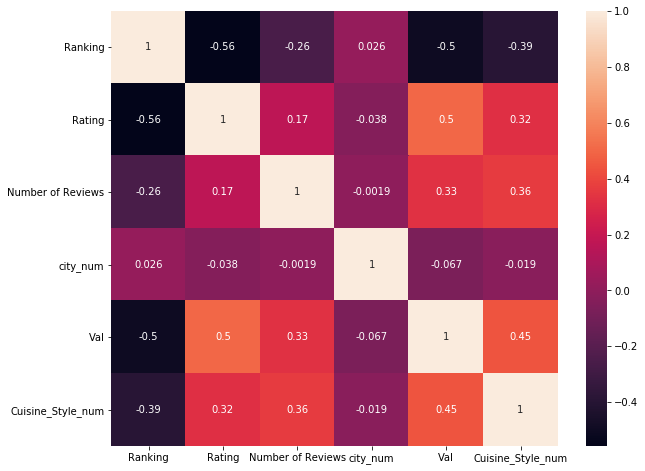

In [73]:
sb.heatmap(ml.corr(),annot=True)

In [74]:
ml.columns

Index(['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Number of Reviews', 'city_num', 'Review', 'Val', 'Cuisine_Style_num'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193E6D4C908>,
      dtype=object)

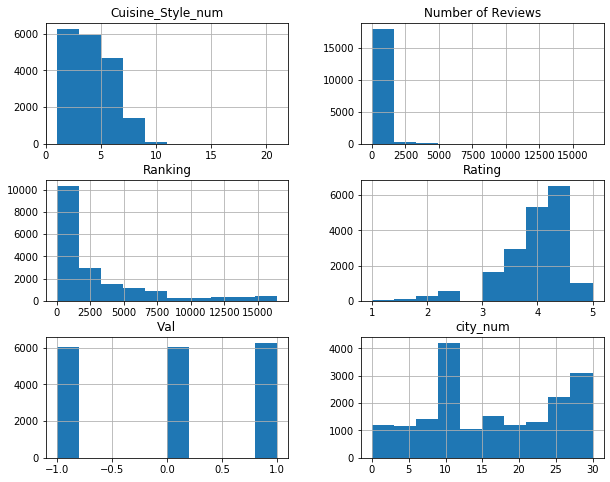

In [75]:
ml.hist()

In [76]:
ml.groupby('Rating').size()

Rating
1.0      24
1.5      81
2.0     243
2.5     579
3.0    1629
3.5    2958
4.0    5322
4.5    6539
5.0    1025
dtype: int64

In [77]:
X=ml[['Ranking', 'Rating', 'Number of Reviews', 'city_num', 'Cuisine_Style_num']].values
Y=ml[['Val']].values

<div id="knn">
<h2 id="knn">KNN</h2>
</div>

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
from sklearn import metrics

y_pred = knn.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(y_pred, Y_test))

C:\Users\91824\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Test set Accuracy:  0.7197826086956521


<div id="support_vector_machines">
<h2 id="support_vector_machines">Support Vector Machines</h2>
</div>

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)

C:\Users\91824\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.69      0.22      0.33      1504
           0       0.54      0.83      0.65      1527
           1       0.88      1.00      0.94      1569

    accuracy                           0.69      4600
   macro avg       0.70      0.68      0.64      4600
weighted avg       0.71      0.69      0.64      4600



<div id="nb">
<h2 id="nb">Naive Bayes</h2>
</div>

In [81]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)

print(nb.score(X_test, Y_test))

C:\Users\91824\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5936956521739131


<div id="random_forest">
<h2 id="random_forest">Random Forest</h2>
</div>

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# training Linear Regression model on training data
rfc.fit(X_train, Y_train)


C:\Users\91824\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.67      0.66      0.66      1504
           0       0.68      0.64      0.66      1527
           1       0.93      1.00      0.96      1569

    accuracy                           0.77      4600
   macro avg       0.76      0.76      0.76      4600
weighted avg       0.76      0.77      0.76      4600



<div id="ans">
<h2 id="ans">Answers</h2>
</div>

For answering questions we have to consider unbalanced DataFrame

## 1

In [84]:
df

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,17,just like home a warm welcome to wintry amsterdam,1
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,17,great food and staff just perfect,1
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,17,satisfaction delicious old school restaurant,1
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,17,true five star dinner a superb evening of fine...,1
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,17,best meal ever super food experience,1
...,...,...,...,...,...,...,...,...,...
74220,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,53.0,14,good food and nice experience disappointing,1
74221,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,104.0,14,good service nice atmoshphere,1
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible,-1
74223,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,21.0,14,horrible it was really horrible i would never ...,-1


In [85]:
q1=df[df['Val']==-1]

In [86]:
q1

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
39,Bussia,Amsterdam,"['Italian', 'European', 'Vegetarian Friendly',...",41.0,4.5,959.0,17,what an unexpectedly great end of a long d exc...,-1
146,Restaurant Haesje Claes,Amsterdam,"['Dutch', 'International', 'European', 'Centra...",148.0,4.0,3595.0,17,not a bad find worth a visit,-1
194,Bierfabriek Amsterdam,Amsterdam,"['Dutch', 'Bar', 'European', 'Pub', 'Grill', '...",197.0,4.0,847.0,17,cheap eats and beer very nice and good restaur...,-1
215,Maoz Vegetarian,Amsterdam,"['Fast Food', 'Mediterranean', 'Middle Eastern...",218.0,4.5,619.0,17,unbelievable falafel amazing,-1
241,Blushing Amsterdam,Amsterdam,"['Dutch', 'Cafe', 'European', 'Vegetarian Frie...",244.0,4.0,542.0,17,not bad but didnt feel any athmosphere in love...,-1
...,...,...,...,...,...,...,...,...,...
74209,Yumi Hana,Zurich,"['Korean', 'Japanese']",1542.0,3.0,50.0,14,what once was a 5 points restaurant is clo bew...,-1
74216,The Pirates,Zurich,['International'],1553.0,2.5,22.0,14,drinks at 5pm noisy wonderful place,-1
74218,Bacaro,Zurich,"['Bar', 'Sushi', 'Delicatessen', 'Pub', 'Wine ...",1558.0,3.0,4.0,14,rude and expensive,-1
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible,-1


In [87]:
lst=[]
for i in ml['Cuisine Style']:
    x=i.replace("['",'').replace("']",'').split("', '")
    lst.extend(x)

In [88]:
lst_s=set(lst)

In [89]:
len(lst),len(lst_s)

(66757, 122)

In [90]:
q=[]
for i in lst_s:
    c=0
    for j in lst:
        if i==j:
            c=c+1
    q.append(c)

In [91]:
len(q)

122

In [92]:
a1=list(zip(lst_s,q))

In [93]:
a1

[('Chilean', 8),
 ('Canadian', 2),
 ('Indonesian', 28),
 ('Street Food', 195),
 ('Argentinean', 148),
 ('Hungarian', 283),
 ('Fast Food', 1162),
 ('French', 1819),
 ('Croatian', 16),
 ('Indian', 570),
 ('Pizza', 1489),
 ('Balti', 54),
 ('Mediterranean', 4034),
 ('Central European', 1520),
 ('Vietnamese', 242),
 ('Tunisian', 11),
 ('Czech', 262),
 ('Thai', 381),
 ('Central Asian', 1),
 ('Native American', 2),
 ('Persian', 35),
 ('Polynesian', 2),
 ('Malaysian', 14),
 ('Halal', 306),
 ('Central American', 91),
 ('Vegetarian Friendly', 8210),
 ('German', 565),
 ('Pakistani', 58),
 ('Delicatessen', 233),
 ('Egyptian', 13),
 ('Southwestern', 10),
 ('Lebanese', 150),
 ('Xinjiang', 1),
 ('Sri Lankan', 10),
 ('Korean', 76),
 ('Mexican', 306),
 ('Armenian', 8),
 ('Tibetan', 19),
 ('Venezuelan', 37),
 ('Norwegian', 94),
 ('Gastropub', 320),
 ('Sushi', 719),
 ('Salvadoran', 2),
 ('Greek', 445),
 ('Dutch', 161),
 ('Cambodian', 8),
 ('Ecuadorean', 6),
 ('Bar', 2095),
 ('Scottish', 171),
 ('Afghani'

In [94]:
x=0
for i in a1:
    if i[1]>x:
        x=i[1]
        y=i[0]

In [95]:
y

'Vegetarian Friendly'

Most common Cuisine Style in restraunts with negetive review is 'Vegetarian Friendly'

## 2

In [96]:
df

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,17,just like home a warm welcome to wintry amsterdam,1
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,17,great food and staff just perfect,1
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,17,satisfaction delicious old school restaurant,1
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,17,true five star dinner a superb evening of fine...,1
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,17,best meal ever super food experience,1
...,...,...,...,...,...,...,...,...,...
74220,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,53.0,14,good food and nice experience disappointing,1
74221,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,104.0,14,good service nice atmoshphere,1
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible,-1
74223,Jade,Zurich,"['Chinese', 'Swiss', 'Mediterranean', 'European']",1584.0,3.0,21.0,14,horrible it was really horrible i would never ...,-1


In [97]:
city_s

['Athens',
 'Rome',
 'Copenhagen',
 'Geneva',
 'Helsinki',
 'Munich',
 'Oporto',
 'Lyon',
 'Hamburg',
 'Dublin',
 'London',
 'Madrid',
 'Vienna',
 'Edinburgh',
 'Zurich',
 'Berlin',
 'Warsaw',
 'Amsterdam',
 'Lisbon',
 'Stockholm',
 'Luxembourg',
 'Bratislava',
 'Ljubljana',
 'Brussels',
 'Prague',
 'Barcelona',
 'Budapest',
 'Krakow',
 'Milan',
 'Paris',
 'Oslo']

In [98]:
r=[]
for i in city_s:
    c1=0
    c2=0
    for j in range(74225):
        if i==df.City[j]:
            c1=c1+1
            if df.Val[j]==1:
                c2=c2+1
    x=c2/c1
    r.append((i,x))

In [99]:
r

[('Athens', 0.8327615780445969),
 ('Rome', 0.7883541039965621),
 ('Copenhagen', 0.8436763550667714),
 ('Geneva', 0.8207547169811321),
 ('Helsinki', 0.8395225464190982),
 ('Munich', 0.8320428826682549),
 ('Oporto', 0.8262586377097729),
 ('Lyon', 0.6998546511627907),
 ('Hamburg', 0.8061821219715957),
 ('Dublin', 0.8452054794520548),
 ('London', 0.8253312682842884),
 ('Madrid', 0.7084311632870864),
 ('Vienna', 0.8296296296296296),
 ('Edinburgh', 0.8247863247863247),
 ('Zurich', 0.8407407407407408),
 ('Berlin', 0.8394415357766143),
 ('Warsaw', 0.801779935275081),
 ('Amsterdam', 0.8730420445177246),
 ('Lisbon', 0.816848281642917),
 ('Stockholm', 0.8299120234604106),
 ('Luxembourg', 0.8581235697940504),
 ('Bratislava', 0.8262910798122066),
 ('Ljubljana', 0.832807570977918),
 ('Brussels', 0.8063555114200596),
 ('Prague', 0.8025326474079937),
 ('Barcelona', 0.7911006103563694),
 ('Budapest', 0.8158536585365853),
 ('Krakow', 0.8220338983050848),
 ('Milan', 0.7506020872357506),
 ('Paris', 0.7964

In [100]:
x=0
for i in r:
    if i[1]>x:
        x=i[1]
        y=i[0]

In [101]:
y

'Amsterdam'

## 3

In [109]:
dfp=df[df['Val']==1]

In [110]:
dfp

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,17,just like home a warm welcome to wintry amsterdam,1
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,17,great food and staff just perfect,1
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,17,satisfaction delicious old school restaurant,1
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,17,true five star dinner a superb evening of fine...,1
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,17,best meal ever super food experience,1
...,...,...,...,...,...,...,...,...,...
74217,Sushi Isakaya,Zurich,"['Japanese', 'Sushi', 'Asian']",1557.0,2.5,58.0,14,sushi better at coop tiny place but tasty sushi,1
74219,Pizza-Blitz Zurich Sud,Zurich,['Pizza'],1565.0,2.5,13.0,14,very down market great pizza and caprese salad,1
74220,Taj Palace,Zurich,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ha...",1569.0,2.5,53.0,14,good food and nice experience disappointing,1
74221,Forum,Zurich,"['Mediterranean', 'European', 'Central Europea...",1580.0,3.5,104.0,14,good service nice atmoshphere,1


In [111]:
dfp.index=np.arange(59766)

In [112]:
lst=[]
for i in dfp.Review:
    x=i.split(' ')
    lst.extend(x)

In [113]:
len(lst)

474031

In [114]:
s=set(lst)

In [115]:
len(s)

18356

In [119]:
a=[]
for i in s:
    c=0
    for j in lst:
        if j==i:
            c=c+1
    a.append(c)

In [126]:
k=list(zip(a,s))

In [127]:
k

[(5717, ''),
 (3, 'creams'),
 (4, 'inedible'),
 (1, 'coeliac'),
 (1, 'capita'),
 (2, 'comparable'),
 (1, 'ciro'),
 (3, 'generic'),
 (1, 'lakas'),
 (4, 'becoming'),
 (1, 'flutes'),
 (1, 'choked'),
 (1, 'lantern'),
 (1, 'lustre'),
 (1, 'descubr'),
 (2, 'italiana'),
 (2, 'abysmal'),
 (1, 'breakfastbrunchco'),
 (1, 'distinct'),
 (3, 'visual'),
 (1, 'gailleton'),
 (1, '930pm'),
 (1, 'howling'),
 (1, 'gang'),
 (1, 'spectacle'),
 (1, 'woderful'),
 (1, 'atea'),
 (4, 'treasures'),
 (1, 'teacoffee'),
 (1, 'atmosfeer'),
 (26, 'wifi'),
 (1, 'flavoury'),
 (2, 'sele'),
 (1, 'inrernational'),
 (2, 'nation'),
 (1, 'barr'),
 (1, 'valuesloooowww'),
 (1, 'gru'),
 (1, 'paiolo'),
 (55, 'calm'),
 (4, 'viewing'),
 (1, 'dre'),
 (2, 'badly'),
 (88, 'walk'),
 (1, 'catalon'),
 (13, 'behind'),
 (1, 'clinically'),
 (2, 'bossy'),
 (64, 'range'),
 (1, 'bratislavanajleps'),
 (1, 'bri'),
 (1, 'antonin'),
 (10, 'apero'),
 (3, 'quart'),
 (1, 'locationlarge'),
 (1, 'budapests'),
 (1, 'aprobar'),
 (7, 'overcharged'),
 (27

In [130]:
k.sort(reverse=True)

In [131]:
k

[(22152, 'food'),
 (20929, 'good'),
 (18856, 'great'),
 (15189, 'and'),
 (12329, 'a'),
 (9998, 'nice'),
 (9466, 'in'),
 (8595, 'the'),
 (8274, 'place'),
 (7176, 'for'),
 (6999, 'service'),
 (6776, 'very'),
 (5860, 'restaurant'),
 (5752, 'excellent'),
 (5717, ''),
 (5573, 'best'),
 (4111, 'to'),
 (4058, 'lunch'),
 (3960, 'with'),
 (3924, 'of'),
 (3898, 'but'),
 (3815, 'delicious'),
 (3207, 'amazing'),
 (3204, 'lovely'),
 (3170, 'friendly'),
 (2896, 'pizza'),
 (2618, 'dinner'),
 (2605, 'not'),
 (2416, 'tasty'),
 (2351, 'italian'),
 (2300, 'atmosphere'),
 (2139, 'meal'),
 (1886, 'staff'),
 (1876, 'little'),
 (1816, 'bar'),
 (1807, 'value'),
 (1799, 'at'),
 (1782, 'experience'),
 (1668, 'fantastic'),
 (1653, 'authentic'),
 (1585, 'local'),
 (1577, 'breakfast'),
 (1537, 'perfect'),
 (1432, 'it'),
 (1415, 'wonderful'),
 (1397, 'price'),
 (1261, 'is'),
 (1255, 'you'),
 (1245, 'gem'),
 (1238, 'pub'),
 (1219, 'on'),
 (1207, 'sushi'),
 (1196, 'quality'),
 (1180, 'really'),
 (1175, 'location'),
 

Most common word used is food but most common emotion is "good".

In [132]:
dfn=df[df['Val']==-1]

In [133]:
dfn

,Name,City,Cuisine Style,Ranking,Rating,Number of Reviews,city_num,Review,Val
39,Bussia,Amsterdam,"['Italian', 'European', 'Vegetarian Friendly',...",41.0,4.5,959.0,17,what an unexpectedly great end of a long d exc...,-1
146,Restaurant Haesje Claes,Amsterdam,"['Dutch', 'International', 'European', 'Centra...",148.0,4.0,3595.0,17,not a bad find worth a visit,-1
194,Bierfabriek Amsterdam,Amsterdam,"['Dutch', 'Bar', 'European', 'Pub', 'Grill', '...",197.0,4.0,847.0,17,cheap eats and beer very nice and good restaur...,-1
215,Maoz Vegetarian,Amsterdam,"['Fast Food', 'Mediterranean', 'Middle Eastern...",218.0,4.5,619.0,17,unbelievable falafel amazing,-1
241,Blushing Amsterdam,Amsterdam,"['Dutch', 'Cafe', 'European', 'Vegetarian Frie...",244.0,4.0,542.0,17,not bad but didnt feel any athmosphere in love...,-1
...,...,...,...,...,...,...,...,...,...
74209,Yumi Hana,Zurich,"['Korean', 'Japanese']",1542.0,3.0,50.0,14,what once was a 5 points restaurant is clo bew...,-1
74216,The Pirates,Zurich,['International'],1553.0,2.5,22.0,14,drinks at 5pm noisy wonderful place,-1
74218,Bacaro,Zurich,"['Bar', 'Sushi', 'Delicatessen', 'Pub', 'Wine ...",1558.0,3.0,4.0,14,rude and expensive,-1
74222,PurPur,Zurich,['Bar'],1581.0,2.0,150.0,14,worst new years eve experience horrible,-1


In [134]:
lst1=[]
for i in dfn.Review:
    x=i.split(' ')
    lst1.extend(x)

In [136]:
len(lst1)

47568

In [137]:
s1=set(lst1)

In [138]:
len(s1)

5418

In [139]:
b=[]
for i in s1:
    c=0
    for j in lst1:
        if j==i:
            c=c+1
    b.append(c)

In [140]:
k1=list(zip(b,s1))

In [141]:
k1.sort(reverse=True)

In [142]:
k1

[(1669, 'food'),
 (1427, 'and'),
 (1128, 'a'),
 (999, 'service'),
 (892, 'good'),
 (816, 'the'),
 (734, 'not'),
 (703, 'bad'),
 (693, 'but'),
 (670, ''),
 (657, 'in'),
 (630, 'for'),
 (615, 'very'),
 (580, 'great'),
 (531, 'cheap'),
 (499, 'to'),
 (460, 'place'),
 (407, 'of'),
 (395, 'expensive'),
 (364, 'restaurant'),
 (361, 'poor'),
 (340, 'worst'),
 (334, 'nice'),
 (328, 'with'),
 (305, 'disappointing'),
 (288, 'average'),
 (286, 'terrible'),
 (280, 'lunch'),
 (260, 'tasty'),
 (253, 'experience'),
 (251, 'ever'),
 (229, 'ok'),
 (225, 'it'),
 (219, 'staff'),
 (218, 'is'),
 (207, 'slow'),
 (204, 'pizza'),
 (202, 'overpriced'),
 (196, 'you'),
 (188, 'quality'),
 (188, 'best'),
 (181, 'at'),
 (176, 'rude'),
 (173, 'excellent'),
 (173, 'awful'),
 (169, 'this'),
 (167, 'i'),
 (166, 'dont'),
 (164, 'dinner'),
 (147, 'meal'),
 (142, 'be'),
 (141, 'horrible'),
 (140, 'no'),
 (139, 'disappointed'),
 (138, 'was'),
 (138, 'go'),
 (135, 'delicious'),
 (132, 'too'),
 (131, 'quick'),
 (130, 'on'),

Here also most common word is food and emotion is "good" but not is also frequently occured so it might be not good.